In [2]:
import config
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from googleapiclient import discovery
import json

In [3]:
API_KEY= config.perspectiveAPI_KEY

In [4]:
service = discovery.build('commentanalyzer', 'v1alpha1', developerKey=API_KEY)

In [5]:
def analizar(comentarios):
    resultados = []
    for comentario in comentarios:
        resultado = {}
        try:
            analyze_request = {
                            'comment': { 'text': comentario },
                            'requestedAttributes': {'TOXICITY_EXPERIMENTAL': {}, 
                                                      'SEVERE_TOXICITY_EXPERIMENTAL':{}}}
            response = service.comments().analyze(body=analyze_request).execute()
            
            resultado['comment'] = comentario
            resultado['toxicity'] =response['attributeScores']['TOXICITY_EXPERIMENTAL']['summaryScore']['value']
            resultado['severe_toxicity'] = response['attributeScores']['SEVERE_TOXICITY_EXPERIMENTAL']['summaryScore']['value']
            resultados.append(resultado)
        except:
            resultado['comment'] = comentario
            resultado['toxicity'] = np.nan
            resultado['severe_toxicity'] = np.nan
            resultados.append(resultado)
    return resultados

In [17]:
df = pd.read_csv('lagacetaDeportes_comentarios_ab.csv', index_col = 5)
df.drop(columns='Unnamed: 0', inplace = True)

In [18]:
df.sample(6)

,autor,es_respuesta,fecha,likes,nota_url,respuestas,seccion,texto,titulo,usuario
nota_id,,,,,,,,,,
523,Bruno Farano,True,12 Oct 2018,14.0,https://www.lagaceta.com.ar/nota/786335/deport...,3,deportes,Se pone loca la Martina y la rajan. Ella no en...,En San Martín nadie baja la guardia y apuestan...,Héctor Fernandez
603,,False,16 Oct 2018,3.0,https://www.lagaceta.com.ar/nota/786746/deport...,2,deportes,Vamos los santos q en este partido te tengo un...,"Las virtudes y los defectos de Racing, el próx...",Walter Soria
510,,False,11 Oct 2018,9.0,https://www.lagaceta.com.ar/nota/786252/deport...,0,deportes,Pedro campos campeón de corner y regalado jaaa...,San Martín no debe regalar ni un centímetro,Cristian Aredes
217,,False,29 Sep 2018,37.0,https://www.lagaceta.com.ar/nota/785112/deport...,0,deportes,Hoy a vestirse de Gloria en el Nuevo Gasómetro...,Atlético buscará su quinto triunfo seguido ant...,Juan Antonio Espinosa
685,,True,21 Oct 2018,5.0,https://www.lagaceta.com.ar/nota/787209/deport...,4,deportes,Siii la verdad que tienen un empuje y una gana...,“Tino” Costa superó las lesiones y será titula...,Juan Antonio Espinosa
123,,True,25 Sep 2018,5.0,https://www.lagaceta.com.ar/nota/784661/deport...,3,deportes,Y la Juana?? Alcah....y cachiporrera!!! Una se...,Echenique fue parado debido a su mal desempeño,Héctor Fernandez


In [19]:
df['severe_toxicity'] = '.'
df['toxicity'] = '.'

In [20]:
df.sample(5)

,autor,es_respuesta,fecha,likes,nota_url,respuestas,seccion,texto,titulo,usuario,severe_toxicity,toxicity
nota_id,,,,,,,,,,,,
492,Federico Espósito,True,10 Oct 2018,7.0,https://www.lagaceta.com.ar/nota/786155/deport...,4,deportes,"Qué comentario tan machista y derrotista, lo q...","Huarmis, las fundadoras del rugby femenino tuc...",Carlos Perelmuter,.,.
551,,False,14 Oct 2018,0.0,https://www.lagaceta.com.ar/nota/786572/deport...,0,deportes,Pongan a los pibes .....ellos pondrán más gana...,La Cuarta de San Martín ganó en el complejo,Cesar Juarez,.,.
523,Bruno Farano,True,12 Oct 2018,2.0,https://www.lagaceta.com.ar/nota/786335/deport...,5,deportes,y eiaaaa!!! Hetitarrrr jajajaja,En San Martín nadie baja la guardia y apuestan...,Walter Delgadino,.,.
686,Miguel Eduardo Décima,True,21 Oct 2018,8.0,https://www.lagaceta.com.ar/nota/787208/deport...,4,deportes,PEDRO CAMPOS vos me podes contestar porque cua...,El hincha de Racing le dio una calurosa bienve...,Ricardo Dulor,.,.
216,,False,29 Sep 2018,24.0,https://www.lagaceta.com.ar/nota/785111/deport...,5,deportes,"estan preparando el hielaso..no,hay caso cuand...",Los hinchas quieren colaborar en la levantada ...,Pablo Salazar,.,.


In [21]:
for i , c in zip(df.index,df.texto):
    try:
        analyze_request = {
                'comment': { 'text': c },
                'requestedAttributes': {'TOXICITY_EXPERIMENTAL': {}, 
                                          'SEVERE_TOXICITY_EXPERIMENTAL':{}}}
        response = service.comments().analyze(body=analyze_request).execute()

        df.loc[i,'toxicity'] = response['attributeScores']['TOXICITY_EXPERIMENTAL']['summaryScore']['value']
        df.loc[i,'severe_toxicity'] = response['attributeScores']['SEVERE_TOXICITY_EXPERIMENTAL']['summaryScore']['value']
    except:
        df.loc[i,'toxicity'] = np.nan
        df.loc[i,'severe_toxicity'] = np.nan

In [22]:
df.to_csv('lagacetaDep_tox_coments.csv' )

In [29]:
# df = pd.read_csv('lagacetaDep_tox_coments.csv' ,  index_col = 0)

In [23]:
df.texto.fillna(' ', inplace=True)

In [24]:
#cantidad comentarios con más de 500 caracteres
df.texto = df.texto.apply(lambda x : x.replace('\r','').replace('\n',''))
df['caracteres'] = df.texto.apply(len)
df.loc[df.caracteres > 500].shape[0]

31

In [25]:
#cantidad de comentarios 500 caracteres sin espacio
df['caracteresSE'] = df.texto.apply(lambda x: len(x) - x.count(' '))
df.loc[df.caracteresSE > 500].shape[0]

20

In [26]:
#Cantidad de comentarios menores a 500 caracteres por seccion
df.loc[df.caracteresSE > 500].groupby('seccion').count().texto

seccion
deportes    20
Name: texto, dtype: int64

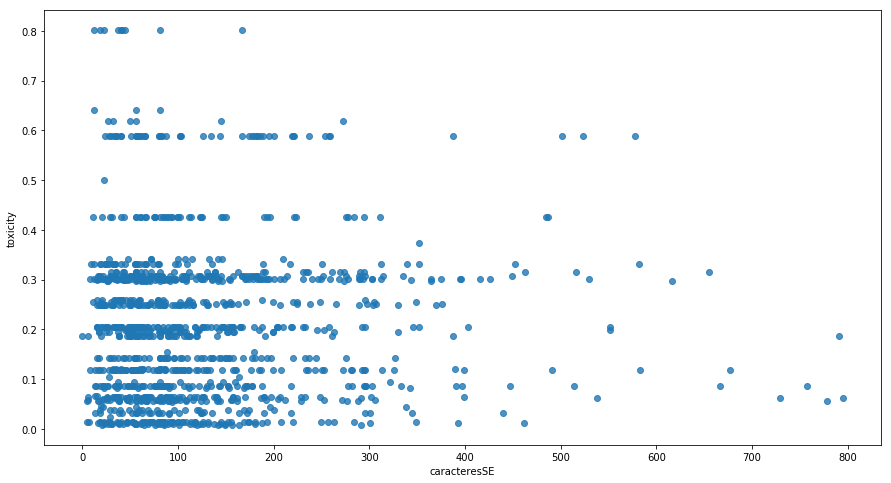

In [27]:
#toxicity x caracteres (sin contar espacios)
plt.figure(figsize = (15, 8))
sns.regplot(df['caracteresSE'], df['toxicity'] , fit_reg=False);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 47 to 766
Data columns (total 14 columns):
autor              1225 non-null object
es_respuesta       1225 non-null bool
fecha              1225 non-null object
likes              1165 non-null float64
nota_url           1225 non-null object
respuestas         1225 non-null int64
seccion            1225 non-null object
texto              1225 non-null object
titulo             1225 non-null object
usuario            1225 non-null object
severe_toxicity    1222 non-null object
toxicity           1222 non-null object
caracteres         1225 non-null int64
caracteresSE       1225 non-null int64
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 175.2+ KB
